幾乎所有的深度學習架構背後的設計核心都是張量和計算圖, PyTorch 也不例外, 本章我們將學習 PyTorch 中的張量系統 (Tensor) 和自動微分系統 (autograd).

## <font color='darkblue'>Tensor</font>
Tensor 又名張量, 它不僅在 PyTorch 中出現過, 也是 Theano, TensorFlow, Torch 和 MXNet 中重要的資料結構. 關於張量的本質不乏深度剖析的文章, 但從工程角度講, 可簡單地認為它就是一個陣列, 且支援高效的科學運算. 它可以是一個數 (純量), 一維陣列 (向量), 二維陣列 (矩陣) 或更高維的陣列 (高階資料). Tensor 和 <b><a href='http://www.numpy.org/'>numpy</a></b> 的 ndarrays 類似, 但 PyTorch 的 tensor 支援 GPU 加速.

本節將系統說明 tensor 的使用, 力求面面俱到, 但不會涉及每個函數. 對於更多函數及其用法, 讀者可透過 IPython/Notebook 中使用 <function>? 檢視說明文件或參考 PyTorch 官方 API 文件.
    
### <font color='darkgreen'>基礎操作</font>
學習過 numpy 的讀者會對本節內容非常熟悉, 因為 tensor 的介面設計與 <b><a href='http://www.numpy.org/'>numpy</a></b> 類似, 以方便使用者使用. 若不熟悉 <b><a href='http://www.numpy.org/'>numpy</a></b> 也沒關係, 本節內容會介紹. 從介面角度講, 對 tensor 的操作可以分為兩種:
1. <a href='https://pytorch.org/docs/stable/torch.html'><b>torch</b></a> 上 function, 例如 <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><b>torch</b>.save</a> 等.
2. <a href='https://pytorch.org/docs/stable/tensors.html'><b>tensor</b></a> 上的 function, 如 <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view'><b>tensor</b>.view</a> 等.

為方便使用, 對 tensor 的大部分操作同時支援這兩個介面, 在這裡如 <font color='blue'>torch.sum(a, b)</font> 與 <font color='blue'>a.sum(b)</font> 功能相同. 從儲存的角度講, 對 tensor 的操作又可分成兩種:
1. 不會修改本身的資料, 如 <font color='blue'>a.add(b)</font>, 加法的結果會回傳一個新的 tensor.
2. 會修改本身資料 (inplace), 如 <font color='blue'>a.add_(b)</font>, 加法的結果會儲存到變數 a 中.

函數名稱以 _ 結尾的都是 inplace 操作, 即會修改呼叫者自己本身的資料.

### 建立 Tensor
在 PyTorch 中新增 tensor 的方法有很多, 常見的方法整理如下:

| 函數 | 功能 |
| --- | --- |
| Tensor(*size) | 建構函式 |
| <a href='https://pytorch.org/docs/stable/torch.html#torch.ones'>ones(*size)</a> | 全部為 1 且長度為 <i>size</i> 的 Tensor |
| <a href='https://pytorch.org/docs/stable/torch.html#torch.zeros'>zeros(*size)</a> | 全部為 0 且長度為 <i>size</i> 的 Tensor |
| <a href='https://pytorch.org/docs/stable/torch.html#torch.eye'>eye(*size)</a> | 對角線為 1, 其他為 0 |
| <a href='https://pytorch.org/docs/stable/torch.html#torch.arange'>arange(s, e, step)</a> | 從 <i>s</i> 到 <i>e</i> 取 步進值 為 <i>step</i> |
| <a href='https://pytorch.org/docs/stable/torch.html#torch.linspace'>linspace(s, e, steps)</a> | 從 <i>s</i> 到 <i>e</i> 均勻分成 <i>steps</i> 份 |
| <a href='https://pytorch.org/docs/stable/torch.html#torch.rand'>rand</a>/<a href='https://pytorch.org/docs/stable/torch.html#torch.randn'>randn(*size)</a> | 均勻/標準分布 |
| <a href='https://pytorch.org/docs/stable/torch.html#torch.normal'>normal(mean std)</a> / uniform(from, to) | 常態分布 / 均勻分布 |
| <a href='https://pytorch.org/docs/stable/torch.html#torch.randperm'>randperm(m)</a> | 隨機排列 |

<br/>
首先來介紹透過 <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor'><b>Tensor</b></a> 建構子建立的 <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor'><b>Tensor</b></a> 實例:

In [1]:
import torch as t

# 指定 tensor 的形狀為 2 rows, 3 columns. 內容值為記憶體當時的值
a = t.Tensor(2, 3)
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [2]:
# 使用 list 建立 tensor
b = t.Tensor([[1, 2, 3], [4, 5, 6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [3]:
# 把 tensor 轉回 list
b.tolist()

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

<a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.size'>tensor.size()</a> 傳回 <font color='blue'><b>torch.Size</b></font> 物件, 它是 tuple 的字類別:

In [4]:
b_size = b.size()
b_size

torch.Size([2, 3])

In [5]:
# 傳回 b 中的元素數目: 2 * 3 = 6
b.numel()

6

In [6]:
# 創建一個與 b 形狀一樣的 tensor
c = t.Tensor(b_size)

# 創建一個元素為 2 和 3 的 tensor
d = t.Tensor((2, 3))

c, d

(tensor([[-2.8855e+08,  8.3658e-43,  0.0000e+00],
         [ 0.0000e+00,  1.4013e-45,  6.0000e+00]]), tensor([2., 3.]))

除了 <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.size'>tensor.size()</a>, 還可以利用 tensor.shape 直接檢視 tensor 的形狀:

In [7]:
b.shape

torch.Size([2, 3])

值得注意的是 t.Tensor(*size) 建立 tensor 時, 系統不會馬上分配空間, 只會計算剩餘的記憶體是否足夠使用, 使用到 tensor 時才會分配, 而其他操作都是在建立 tensor 後馬上進行空間分配. 其他常用的建立 tensor 方式舉例如下:

In [8]:
t.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
t.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [10]:
t.arange(1, 6, 2)

tensor([1, 3, 5])

In [11]:
t.linspace(1, 10, 3)

tensor([ 1.0000,  5.5000, 10.0000])

In [12]:
t.randn(2, 3)

tensor([[ 0.0099, -0.2518, -0.2731],
        [-0.3166,  0.2981, -0.3879]])

In [13]:
t.randperm(5) # 長度為 5 的隨機排列

tensor([0, 4, 2, 1, 3])

In [14]:
t.eye(2, 3)

tensor([[1., 0., 0.],
        [0., 1., 0.]])

### 常用的 Tensor 操作
透過 <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view'>tensor.view</a> 方法可以修改 tensor 的形狀, 但必須確定調整前後元素總數一致. view 不會修改本身的資料, 傳回的新 tensor 與原來的 tensor 共用記憶體, 即更改其中一個, 另一個也會跟著改變. 在實際應用場合可能經常需要增加或減少某一維度, 這時 <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.squeeze'>squeeze</a> 和 <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.unsqueeze'>unsqueeze</a> 兩個函數就派上用場.

In [15]:
a = t.arange(0, 6)
a

tensor([0, 1, 2, 3, 4, 5])

In [16]:
a.view(2, 3)

tensor([[0, 1, 2],
        [3, 4, 5]])

In [17]:
# 當某一維度為 -1 時, 會自動計算它的大小
b = a.view(-1, 3)
b

tensor([[0, 1, 2],
        [3, 4, 5]])

In [18]:
# 在第一維 (下標從 0 開始) 上增加 "1"
b1 = b.unsqueeze(1)
b1

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [19]:
b1.shape

torch.Size([2, 1, 3])

In [20]:
# -2 表示倒數第二個維度
b2 = b.unsqueeze(-2)
b2

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [21]:
b2.shape

torch.Size([2, 1, 3])

In [22]:
c = b.view(1, 1, 1, 2, 3)
c

tensor([[[[[0, 1, 2],
           [3, 4, 5]]]]])

In [23]:
c.shape

torch.Size([1, 1, 1, 2, 3])

In [24]:
# 壓縮第 0 維
c1 = c.squeeze(0)
c1

tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [25]:
c1.shape

torch.Size([1, 1, 2, 3])

In [26]:
# 把所有維度為 "1" 進行壓縮 
c2 = c.squeeze()
c2

tensor([[0, 1, 2],
        [3, 4, 5]])

In [27]:
c2.shape

torch.Size([2, 3])

In [28]:
a[1] = 100

# b 與 a 共用記憶體, 修改了 a, b 也會改變
a, b

(tensor([  0, 100,   2,   3,   4,   5]), tensor([[  0, 100,   2],
         [  3,   4,   5]]))

resize 是另一種可用來調整 size 的方法, 但與 view 不同的是它可以 tensor 的尺寸. 如果新尺寸超過原尺寸, 會自動分配新的記憶體空間; 而如果尺寸小於原尺寸, 則之前的資料依舊會被儲存, 先來看一個範例:

In [29]:
b.resize_(1, 3)
b

tensor([[  0, 100,   2]])

In [30]:
# 舊資料依舊保存著, 多出來的空間則為分配到的記憶體空間的值
b.resize_(3, 3)
b

tensor([[            0,           100,             2],
        [            3,             4,             5],
        [            0,             0, 2567799701136]])

### 索引操作
<a href='https://pytorch.org/docs/stable/tensors.html#'><b>Tensor</b></a> 支援與 <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html'><b>numpy.ndarray</b></a> 類似的索引操作, 語法上也類似, 下面透過範例說明常用的索引操作. 如無特殊說明, 索引出來的結果與 Tensor 共用記憶體, 即修改一個會反映到另一個:

In [31]:
a = t.randn(3, 4)
a

tensor([[-0.0337,  1.2891,  0.5059,  0.0979],
        [ 1.1066, -1.1860,  0.2501, -1.4673],
        [ 0.5826, -1.1911, -2.6953, -2.2500]])

In [32]:
# 第 0 行 (下標從 0 開始)
a[0]

tensor([-0.0337,  1.2891,  0.5059,  0.0979])

In [33]:
# 第 0 列
a[:, 0]

tensor([-0.0337,  1.1066,  0.5826])

In [34]:
# 第 0 行; 第 2 列 上的元素. 等同 a[0][2]
a[0, 2]

tensor(0.5059)

In [35]:
# 第 0 行, 最後一個元素
a[0][-1]

tensor(0.0979)

In [36]:
# 前兩行
a[:2]

tensor([[-0.0337,  1.2891,  0.5059,  0.0979],
        [ 1.1066, -1.1860,  0.2501, -1.4673]])

In [37]:
# 前兩行, 第 0, 1 列
a[:2, 0:2]

tensor([[-0.0337,  1.2891],
        [ 1.1066, -1.1860]])

In [38]:
print(a[0:1, :2])  # 第 0 行, 前兩列
print(a[0, :2])    # 同上, 但形狀不同

tensor([[-0.0337,  1.2891]])
tensor([-0.0337,  1.2891])


In [39]:
a > 1  # 返回一個 ByteTensor

tensor([[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)

In [40]:
a[a > -0.5]  # 等值 a.masked_select(a > 1). 選擇結果不共享記憶體空間

tensor([-0.0337,  1.2891,  0.5059,  0.0979,  1.1066,  0.2501,  0.5826])

In [41]:
# 第 0 行與第 1 行
a[t.LongTensor([0, 1])]

tensor([[-0.0337,  1.2891,  0.5059,  0.0979],
        [ 1.1066, -1.1860,  0.2501, -1.4673]])

其他常用選擇函數整理如下表:

| 函數 | 功能 |
| --- | --- |
| <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.index_select'>index_select(input, dim, index)</a> | 在指定維度 dim 上選取, 例如選取某些行, 某些列 |
| <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.masked_select'>masked_select(input, mask)</a> | 實例如上, 使用 ByteTensor 進行選取 |
| non_zero(input) | 非 0 元素的索引 |
| <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.gather'>gather(input, dim, index)</a> | 根據 index, 在 dim 維度 上選取資料, 輸出的 size 與 index 一樣 |

gather 是一個比較複雜的操作, 對一個 二維 tensor, 輸出的每個元素如下:
```python
out[i][j] = input[index[i][j]][j]  # dim=0
out[i][j] = input[i][index[i][j]]  # dim=1
```
3D tensor 的 gather 操作同理, 下面舉幾個實例:

In [42]:
a = t.arange(0, 16).view(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [43]:
# 選取對角線的元素
index = t.LongTensor([[0, 1, 2, 3]])
a.gather(0, index)

tensor([[ 0,  5, 10, 15]])

In [44]:
# 選取反對角線上的元素
index = t.LongTensor([[3, 2, 1, 0]])
index.t()

tensor([[3],
        [2],
        [1],
        [0]])

In [45]:
a.gather(1, index.t())

tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [46]:
# 直覺也許你會使用下面方式取反對角線元素, 但結果卻...
index = t.LongTensor([[3, 2, 1, 0]])
a.gather(0, index)

tensor([[12,  9,  6,  3]])

In [47]:
# 選取兩個對角線上的元素
index = t.LongTensor([[0, 1, 2, 3], [3, 2, 1, 0]]).t()
index

tensor([[0, 3],
        [1, 2],
        [2, 1],
        [3, 0]])

In [48]:
a.gather(1, index)

tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])

### 進階索引
PyTorch 0.2 版中增強了索引操作, 目前已經支援大多數 numpy 風格的進階索引. 進階索引可以看成是普通索引操作的擴充, 但進階索引操作的結果一般布和原始的 Tensor 共用記憶體.

In [49]:
x = t.arange(0, 27).view(3, 3, 3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [50]:
x[[1, 2], [1, 2], [2, 0]]  # x[1, 1, 2], 和 x[2, 2, 0]

tensor([14, 24])

In [51]:
x[[2, 1, 0], [0], [1]]  # x[2, 0, 1], x[1, 0, 1], x[0, 0, 1]

tensor([19, 10,  1])

In [52]:
x[[0, 1], ...]  # x[0] 和 x[1]

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

### Tensor 類型
<b><a href='https://pytorch.org/docs/stable/tensors.html'>Tensor 有不同的資料類型</a></b>, 如下表所示, 每種類型分別對應有 CPU, GPU 版本 (<font color='brown'>HalfTensor 除外</font>). 預設的 tensor 是 <b>FloatTensor</b>, 可透過 <font color='blue'>t.set_default_tensor_type</font> 修改預設 tensor 類型 (<font color='brown'>如果預設類型為 GPU tensor, 則所有操作都將在 GPU 上進行</font>). Tensor 的類型對分析記憶體占用很有幫助. 舉例來說, 一個 size 為 (1000, 1000, 1000) 的 <b>FloatTensor</b>, 它有 1000 x 1000 x 1000 = 10^9 個元素, 每個元素佔 32/bit/8 = 4 bytes 記憶體, 所以共佔大約 4GB 記憶體/顯示卡記憶體. <b>HalfTensor</b> 是專門為 GPU 版本設計的, 同樣的元素個數, 顯示卡記憶體占用只有 FloatTensor 的一半, 所以可以相當大地緩解 GPU 顯示卡記憶體不足的問題, 但由於 <b>HalfTensor</b> 所能表示的數值大小與精度有限, 可能出現溢位等問題.
<img src='https://github.com/johnklee/pytorch_tutorials/raw/master/ch03/images/T3-3.PNG'/>
<center>表 3-3 tensor 資料類型</center>

個資料類型之間可以互相轉換, <font color='blue'>type(<i>new_type</i>)</font> 是通用做法, 同時還有 float, long, half 等快速方法. CPU tensor 與 GPU tensor 之間的互相轉換透過 <b>tensor.cude</b> 和 <b>tensor.cpu</b> 的方法實現. Tensor 還有一個 <font color='blue'>new</font> 方法, 用法語 t.Tensor 一樣, 會呼叫該 tensor 對應類型的建置函數, 產生與目前 tensor 類型一致的的 tensor.

In [53]:
# 設定預設 tensor, 注意參數是字符串
# known issue:　https://github.com/pytorch/pytorch/issues/21989
# t.set_default_tensor_type('torch.IntTensor')

In [54]:
a = t.Tensor(2, 3)
print(a.type())   # 現在 a 是 FloatTensor
a

torch.FloatTensor


tensor([[1.4013e-45, 0.0000e+00, 1.4013e-45],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [55]:
b = a.int()
print(b.type())
b  # 把 a 轉換成 torch.IntTensor

torch.IntTensor


tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [56]:
c = a.type_as(b)
print(c.type())
c  # c 的類型與 b 一致

torch.IntTensor


tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [57]:
d = a.new(2, 3)  # 等值為 torch.FloatTensor(2, 3)
print(d.type())
d

torch.FloatTensor


tensor([[1.4013e-45, 0.0000e+00, 1.4013e-45],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [58]:
# a.new??  # 查看函數 new 的原始碼

### 逐元素操作
這部分操作會對 tensor 的每一個元素 (<font color='brown'>point-wise, 又名 element-wise</font>) 進行操作, 這種操作的輸入與輸出形狀一致. 常用操作如下表:

| 函數 | 功能 |
| --- | --- |
| abs/sqrt/div/exp/fmod/log/pow... | 絕對值/平方根/除法/指數/求餘/求冪 |
| cos/sin/asin/atan2/cosh | 三角函數 |
| ceil/round/floor/trunc | 上取函數/四捨五入/下取函數/只保留整數部分 |
| clamp(input, min, max) | 超過 min 和 max 部分截斷
| sigmod/tanh... | 啟動函數 | 

對於很多操作, 例如 div, mul, pow, fmod 等, PyTorch 都實現了運算子多載, 所以可以直接使用運算子. 舉例來說, <font color='blue'>a ** 2</font> 相當於 <font color='blue'>torch.pow(a, 2)</font>; <font color='blue'>a * 2</font> 相等於 <font color='blue'>torch.mul(a, 2)</font>. <a href='https://pytorch.org/docs/stable/tensors.html#torch.Tensor.clamp'>clamp</a> 常用在某些需要比大小的地方, 如取一個 tensor 的每個元素與另一個數的較大值:

In [59]:
a = t.arange(0, 6).view(2, 3).float()
t.cos(a)

tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837]])

In [60]:
a % 3  # 等值於 t.fmod(a, 3): https://pytorch.org/docs/stable/torch.html#torch.fmod

tensor([[0., 1., 2.],
        [0., 1., 2.]])

In [61]:
a ** 2  # 等值於 t.pow(a, 2)

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [62]:
# a 中一個元素都與 3 相比, 取較大的一個
print(a)
t.clamp(a, min=3)

tensor([[0., 1., 2.],
        [3., 4., 5.]])


tensor([[3., 3., 3.],
        [3., 4., 5.]])

### 歸併操作
這種操作會使輸出形狀小於輸入形狀, 並可以沿著某一維度進行指定操作. 如加法 sum , 既可以計算整個 tensor 的合, 也可以計算 tensor 中每一行或每一列的合. 常用的歸併操作如下表所示:

| 函數 | 功能 |
| --- | --- |
| mean/sum/median/mode | 平均值/合/中位數/眾數 |
| norm/dist | 範數/距離 |
| std/var | 標準差/方差 |
| cumsum/cumprod | 累加/累乘 |

以上大多函數都有一個參數 <font color='violet'>dim</font> 用來指定這些操作是在哪個維度上執行的. 關於 <font color='violet'>dim</font> (<font color='brown'>對應於 Numpy 中的 axis</font>) 的解釋眾說紛紜, 這裡提供一個簡單的記憶方法. 假設輸入的形狀是 (m, n, k):
* 如果指定 <font color='blue'>dim=0</font>, 輸出形狀就是 (1, n, k) 或 (n, k); 
* 如果指定 <font color='blue'>dim=1</font>, 輸出形狀就是 (m, 1, k) 或 (m, k); 
* 如果指定 <font color='blue'>dim=2</font>, 輸出形狀就是 (m, n, 1) 或 (m, n).

size 中是否有 "1" 取決於參數 <font color='violet'>keepdim</font>, <font color='blue'>keepdim=True</font> 會保留維度 1. 從 Pytorch 0.2.0 版起, <font color='violet'>keepdim</font> 預設為 False. 注意! 以上只是經驗歸納, 並非所有函數都符合上面說明的形狀變化方式, 如 [cumsum](https://pytorch.org/docs/stable/torch.html#torch.cumsum).

In [63]:
b = t.ones(2, 3)
print(b.type())
print(b.shape)
b

torch.FloatTensor
torch.Size([2, 3])


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [64]:
b0_sum = b.sum(dim = 0, keepdim=True)
print(b0_sum.shape)
b0_sum

torch.Size([1, 3])


tensor([[2., 2., 2.]])

In [65]:
b1_sum = b.sum(dim = 1, keepdim=True)
print(b1_sum.shape)
b1_sum

torch.Size([2, 1])


tensor([[3.],
        [3.]])

In [66]:
b1_dft_sum = b.sum(dim = 1) # Default keepdim=False
print(b1_dft_sum.shape)
b1_dft_sum

torch.Size([2])


tensor([3., 3.])

In [67]:
a = t.arange(0, 9).view(3, 3)
print(a)
print(a.cumsum(dim=1))  # 沿 row 累加
print(a.cumsum(dim=0))  # 沿 col 累加

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[ 0,  1,  3],
        [ 3,  7, 12],
        [ 6, 13, 21]])
tensor([[ 0,  1,  2],
        [ 3,  5,  7],
        [ 9, 12, 15]])


### 比較
比較函數中常有一些是逐元素比較, 操作類似逐元素操作, 還有一些規則類似歸併操作. 常用的比較函數如下表:

| 函數 | 功能 |
| --- | --- |
| gt/lt/ge/le/eq/ne | 大於/小於/大於等於/小於等於/等於/不等 |
| topk | 最大的 k 個數 |
| sort | 排序 |
| max/min | 比較兩個 tensor 的最大和最小值 |

表中第一行的比較操作已經實現了運算子的多載, 因此可以使用 a > b, a >= b, a < b 等操作, 其傳回結果為一個 <b>ByteTensor</b>, 可以用來選取元素. [max](https://pytorch.org/docs/stable/torch.html#torch.max)/[min](https://pytorch.org/docs/stable/torch.html#torch.min) 這兩個操作比較特殊, 以 [max](https://pytorch.org/docs/stable/torch.html#torch.max) 為例, 它有以下三種使用情況:
* <b>t.max</b>(tensor): 傳回 tensor 中最大值
* <b>t.max</b>(tensor, dim): 指定維度上最大的數, 傳回 tensor 和索引.
* <b>t.max</b>(tensor1, tensor2): 比較兩個 tensor 相比較的較大元素.

In [68]:
a = t.linspace(0, 15, 6).view(2, 3)
print(a.shape)
a

torch.Size([2, 3])


tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])

In [69]:
b = t.linspace(15, 0, 6).view(2, 3)
print(b.shape)
b

torch.Size([2, 3])


tensor([[15., 12.,  9.],
        [ 6.,  3.,  0.]])

In [70]:
r = a > b
print(r.type())
print(r.shape)
r

torch.ByteTensor
torch.Size([2, 3])


tensor([[0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [71]:
r = a[ a > b]  # a 中 大於 b 的元素
print(r.type())
print(r.shape)
r

torch.FloatTensor
torch.Size([3])


tensor([ 9., 12., 15.])

In [72]:
t.max(a)  # a 中最大元素

tensor(15.)

In [73]:
print(b)
r1, r2 = t.max(b, dim=1) 
# 第一個 r1 返回值的 15 和 6 分別表示第 0 行 與第 1 行最大的元素
# 第二個 r2 返回值的第一個 0 表示第一個最大值在第一行中的位置. 以此類推.
print(r1)
print(r2)

tensor([[15., 12.,  9.],
        [ 6.,  3.,  0.]])
tensor([15.,  6.])
tensor([0, 0])


In [74]:
r = t.max(a, b)  # 每個位置上取 max(a 元素, b 元素)
print(r.type())
print(r.shape)
r

torch.FloatTensor
torch.Size([2, 3])


tensor([[15., 12.,  9.],
        [ 9., 12., 15.]])

In [75]:
r = t.clamp(a, min=10)  # 每個位置上取 max(a 元素, 10)
print(r.type())
print(r.shape)
r

torch.FloatTensor
torch.Size([2, 3])


tensor([[10., 10., 10.],
        [10., 12., 15.]])

### 線性代數
PyTorch 的線性函數主要封裝了 Blas 和 Lapack, 其用法和介面都與之類似. 常用的線性代數函數如下表:

| 函數 | 功能 |
| --- | --- |
| trace | 對角線元素之合 ([矩陣的跡](https://en.wikipedia.org/wiki/Matrix_(mathematics)#Trace)) |
| diag | 對角線元素 |
| triu/tril | 矩陣的 上三角, 下三角, 可指定偏移量 |
| mm/bmm | 矩陣乘法, batch 的矩陣乘法 |
| addmm/addbmm/addmv | 矩陣運算 |
| t | [轉置](https://en.wikipedia.org/wiki/Transpose) |
| dot/cross | 內積/外積 |
| inverse | 求反矩陣 |
| svd | 奇異值分解 | 
<center>表 3-7 常用的線性代數函數</center>

這邊需要注意的是矩陣的轉置會導致儲存空間不連續, 需呼叫它的 [.contiguous](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.contiguous) 方法將其轉為連續.

In [76]:
print(a)
b = a.t()
print(b)

tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])
tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]])


In [77]:
b.is_contiguous()

False

In [78]:
c = b.contiguous()

In [79]:
c.is_contiguous()

True

### <font color='green'>Tensor 和 Numpy</font>
Tensor 和 Numpy 陣列之間有很高的相似性, 彼此之間的互動操作也非常簡單高效. 需要注意的是, <b>Numpy 和 Tensor 共用記憶體. 由於 Numpy 歷史悠久, 支援豐富的操作, 所以當遇到 Tensor 不支援的操作時, 可以先轉成 Numpy 陣列, 處理後再轉回 tensor, 其轉換負擔很小</b>.

In [80]:
import numpy as np

a = np.ones([2, 3])
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [81]:
b = t.from_numpy(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [82]:
b = t.Tensor(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [83]:
a[0, 1] = 100
print(a)
print(b)  # b 不受引響. b 與 a 不共用記憶體

[[  1. 100.   1.]
 [  1.   1.   1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [84]:
c = b.numpy()  # b 與 c 共用記憶體
c

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [85]:
c[0, 1] = 100
b

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])

In [86]:
d = t.Tensor(c)
print(d)
d[0, 0] = 0
print(d)
print(c)  # c will be changed too. b, c, d 共用記憶體

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])
tensor([[  0., 100.,   1.],
        [  1.,   1.,   1.]])
[[  0. 100.   1.]
 [  1.   1.   1.]]


廣播法則 (Broadcasting) 是科學運算中常用的技巧, 它在快速執行向量化同時不會占用額外記憶體, Numpy 的廣播法則定義如下:
* (1) 讓所有輸入陣列都在其中 shape 最長的陣列看齊, shape 中不足的部分透過在前面加一補齊.
* (2) 兩個陣列在某一個維度長度不一致時, 就是其中一個為一, 否則不能計算.
* (3)當輸入陣列的某個維度的長度為 1 時, 計算時沿此維度複製擴充成一樣形狀.

PyTorch 目前已經支援了自動廣播法則, 但是這裡還是建議透過以下兩個函數的組合實現廣播法則, 這樣更為直觀, 更不容易出錯.
* [unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) 或 view: 為資料某一維度的形狀補 1, 實現法則 (1)
* [expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) 或 [expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as): 重複陣列, 實現法則 (3); 該操作不會複製陣列, 所以不會占用額外空間.


In [87]:
a = t.ones(3, 2)
b = t.zeros(2, 3, 1)

In [88]:
# 自動廣播法則
# 第一步: a 是二維, b 是三維, 所以先在較小的 a 前面補 1
# 即 a.unsqueeze(0), a 的形狀變成 (1, 3, 2). b 的形狀是 (2, 3, 1)
# 第二步: a 和 b 在第一, 三維的形狀不一樣, 其中一個為 1
# 透過廣播法則擴充為 (2, 3, 2)
a + b

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [89]:
# 手動廣播法則
# 或者 a.view(1, 3, 2).expand(2, 3, 2) + b.expand(2, 3, 2)
a.unsqueeze(0).expand(2, 3, 2) + b.expand(2, 3, 2)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

### <font color='darkgreen'>內部結構</font>
tensor 的資料結構如下圖所示. tensor 分為標頭資訊區 (Tensor) 和儲存區 (Storage), 資訊區主要儲存 tensor 的形狀 (size), 步進值 (stride), 資料型態 (type) 等資訊, 而真正的資料則儲存成連續陣列. 由於資料動輒成千上萬, 因此資訊區元素占用記憶體較少, 主要記憶體占用取決於 tensor 中元素的數目, 即儲存區的大小.

一般來說, 一個 tensor 具有與之相對應的 storgae, storage 是在 data 上面封裝的介面. 不同的 tensor 的標頭資訊一般不同, 但卻可能使用相同的 storage. 下面我們來看兩個實例:

In [90]:
a = t.arange(0, 6)
a.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [91]:
b = a.view(2, 3)
b.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [92]:
# 一個對象的 id 值可以看做它在記憶體中的位址
# storage 的記憶體位址一樣, 即是同一個 storage
id(b.storage) == id(a.storage)

True

In [93]:
# a 改變, b 也隨之改變, 因為他們共享記憶體
a[1] = 100
b

tensor([[  0, 100,   2],
        [  3,   4,   5]])

In [94]:
c = a[2:]
c.storage()

 0
 100
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [95]:
# data_ptr 返回 tensor 首元素的記憶體位址
# 可以看出相差八, 這是因為 a 與 c 相差兩個元素, 一個元素佔 8 bytes, 故 2 * 4 = 8
c.data_ptr(), a.data_ptr() 

(2567802837344, 2567802837328)

In [96]:
c[0] = -100 # c[0] 記憶體位址對應 a[2] 的記憶體位址
a

tensor([   0,  100, -100,    3,    4,    5])

In [97]:
a.storage_offset(), c.storage_offset()

(0, 2)

In [98]:
e = b[::2, ::2]  
id(e.storage()) == id(a.storage())

True

In [99]:
print('b shape={}'.format(b.shape))
print('e shape={}'.format(e.shape))
b.stride(), e.stride()

b shape=torch.Size([2, 3])
e shape=torch.Size([1, 2])


((3, 1), (6, 2))

In [100]:
e.is_contiguous()

False

由上可知絕大多數的操作並不修改 tensor 的資料, 只是修改了 tensor 的標頭資訊. 這種做法更節省記憶體, 同時提升了處理速度. 此外有些操作會導致 tensor 不連續, 這是需呼叫 [**tensor**.contiguous](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.contiguous) 方法將他們變成連續的資料, 該方法複製資料到新的記憶體, 不再與原來的資料共用 storage. 另外讀者可以思考一下, 之前說過的進階索引一般不可共用 storage, 而普通索引共用 storage, 這是為什麼呢? (提示: 普通索引可以透過修改 tensor 的 offset, stride 和 sizie 實現, 不修改 storage 的資料, 進階索引則不行)

### <font color='green'>其他有關 Tensor 的話題 </font>


### 持久化
Tensor 的儲存與載入十分簡單, 使用 [t.save](https://pytorch.org/docs/stable/torch.html?highlight=t%20save#torch.save) 和 [t.load](https://pytorch.org/docs/stable/torch.html?highlight=t%20save#torch.load) 即可完成對應的功能. 在 save/load 時可指定使用的 pickle 模組, 在 load 時還可以將 GPU tensor 對映到 CPU 或其他 GPU 上:

In [101]:
t.cuda.is_available()

True

In [102]:
if t.cuda.is_available():
    a = a.cuda(0)  # 把 a 轉為 GPU0 上的 tensor,
    t.save(a, 'a.pth')
    
    # 加載為 b 並儲存在 GPU0 上
    b = t.load('a.pth')
    
    # 加載為 c 並儲存在 CPU 
    c = t.load('a.pth', map_location=lambda storage, loc: storage)

### 向量化
向量化計算是一種特殊平行計算方式, 一般程式在同一時間只執行一個操作的方式, 它可在同一時間執行多個操作, 通常是對不同的資料執行同樣的一個或一批指令, 或說把指令應用於一個陣列/向量上. 向量化可相當大地加強科學運算效率, Python 本身是一種高階語言, 使用方便, 但許多操作很低效, 尤其是 for 循環. **在科學計算程式中應當極力避免使用 Python 原生的 for 循環, 而改用向量化的數值計算**.

In [103]:
def for_loop_add(x, y):
    result = []
    for i, j in zip(x, y):
        result.append(i + j)
        
    return t.Tensor(result)

In [104]:
x = t.zeros(1000)
y = t.ones(1000)

%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 x + y

9.92 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 7.88 times longer than the fastest. This could mean that an intermediate result is being cached.
11.7 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


由上可知兩者有超過 100 倍的速度差距, 因此在實際使用中應盡量呼叫內建函數, 這些函數底層由 C/C++ 實現, 能透過執行底層最佳化實現高效計算. 因此在平時寫程式時, 就應該養成向量化的思維習慣.

此外還有以下幾點需要注意:
* 大多數 t.function 都有一個參數 out, 這時產生的結果將儲存在 out 指定的 tensor 之中.
* [t.set_num_threads](https://pytorch.org/docs/stable/torch.html#torch.set_num_threads) 可以設定 PyTorch 進行 CPU 多執行緒平行計算時所占用的執行緒, 用來限制 PyTorch 所占用的 CPU 數目.
* [t.set_printoptions](https://pytorch.org/docs/stable/torch.html#torch.set_printoptions) 可以用來設定列印 tensor 時的數值精度和格式.

In [105]:
a = t.IntTensor()
t.arange(0, 20000, out=a)
print(a[-1], a[-2])

b = t.LongTensor()
t.arange(0, 20000, out=b) # 64 bits 的 LongTensor 不會溢出
print(b[-1], b[-2])

tensor(19999, dtype=torch.int32) tensor(19998, dtype=torch.int32)
tensor(19999) tensor(19998)


In [106]:
a = t.randn(2, 3)
a

tensor([[ 0.9329, -1.2726, -1.3018],
        [ 0.4908,  0.5335,  0.4666]])

In [107]:
t.set_printoptions(precision=8)
a

tensor([[ 0.93287075, -1.27256680, -1.30184746],
        [ 0.49080709,  0.53354150,  0.46657836]])

### <font color='green'>小試牛刀</font>
線性回歸是機器學習的入門知識, 應用十分廣泛. 其表達形式為 y = wx + b + e, 誤差 e 服從平均值為 0 的常態分佈:

In [108]:
import torch as t
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

In [109]:
# 設定隨機數 seed, 保證在不同計算機上運行下的輸出一致.
t.manual_seed(1000)

def get_fake_data(batch_size=20):
    ''' 產生隨機資料: y = x * 2 + 3 , 並加上一些雜訊'''
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1)) * 3
    return x, y

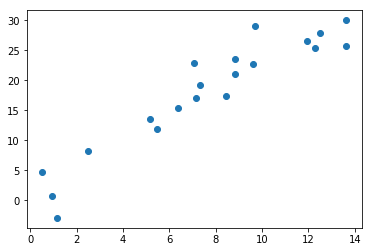

In [110]:
# 來看看產生的 x-y 分布
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [139]:
w = t.rand(1, 1)
b = t.zeros(1, 1)
x = t.arange(0, 20)
print('b.shape={}; x.shape={}'.format(b.view(1).shape, x.shape))
print(w.numpy()[0][0])
print(x.float() * w.numpy()[0][0] + b.view(1).expand_as(x))
#print(b.shape)

b.shape=torch.Size([1]); x.shape=torch.Size([20])
0.5635384
tensor([ 0.00000000,  0.56353837,  1.12707675,  1.69061518,  2.25415349,
         2.81769180,  3.38123035,  3.94476867,  4.50830698,  5.07184553,
         5.63538361,  6.19892216,  6.76246071,  7.32599878,  7.88953733,
         8.45307541,  9.01661396,  9.58015251, 10.14369106, 10.70722866])


x.shape=torch.Size([20])


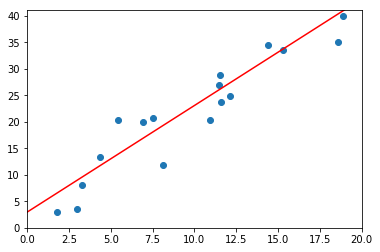

Final w=tensor([[1.99517000]])
Final b=tensor([[2.96910644]])


In [147]:
# 隨機初始化參數
batch_size = 20
w = t.rand(1, 1)
b = t.zeros(1, 1)
print('Initial w={}'.format(w))
print('Initial b={}'.format(b))

lr = 0.0001 # 學習率
for ii in range(10000):
    x, y = get_fake_data(batch_size=batch_size)
    
    # forward: 計算 loss
    # print('x.shape={}; w.shape={}; y.shape={}'.format(x.shape, w.shape, y.shape))
    y_pred = x.float().mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2  # 均方誤差
    loss = loss.sum()
    
    # backward: 手動計算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新參數
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii % 2000 == 0:
        print('Trained w={}'.format(w))
        print('Trained b={}'.format(b))
    
        # 畫圖
        display.clear_output(wait=True)
        x = t.arange(0, 20)
        print('x.shape={}'.format(x.shape))
        y = x.float() * w.numpy()[0][0] + b.view(1).expand_as(x)
        plt.plot(x.squeeze().numpy(), y.squeeze().numpy(), color='red')  # prediction
        
        x2, y2 = get_fake_data(batch_size=batch_size)
        plt.scatter(x2.numpy(), y2.numpy())  # true data
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()  # show graph
        plt.pause(1)
        
print('Final w={}'.format(w))
print('Final b={}'.format(b))

最後的訓練結果, w 接近於 2, b 接近於 3, 並且圖中的直線和資料已經相當接近. 